#BUSINESS UNDERSTANDING

#Introduction

The liver is an organ about the size of a football. It sits just under your rib cage on the right side of your abdomen. The liver is essential for digesting food and ridding your body of toxic substances. Liver disease can be inherited (genetic). Liver problems can also be caused by a variety of factors that damage the liver, such as viruses, alcohol use, and obesity.
Over time, conditions that damage the liver can lead to scarring (cirrhosis), which can lead to liver failure, a life-threatening condition. But early treatment may give the liver time to heal. 
Patients with the Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms to reduce the burden on doctors.


Many tests can be performed on the liver. Certain tests can reflect different aspects of liver function. Commonly used tests to check liver abnormalities are tests checking: alanine transaminase (ALT) aspartate aminotransferase (AST) alkaline phosphatase (ALP) albumin bilirubin 

##Something something something

Overview Liver problems showing normal and diseased livers Liver problemsOpen pop-up dialog box The liver is an organ about the size of a football. It sits just under your rib cage on the right side of your abdomen. The liver is essential for digesting food and ridding your body of toxic substances. Liver disease can be inherited (genetic). Liver problems can also be caused by a variety of factors that damage the liver, such as viruses, alcohol use and obesity. Over time, conditions that damage the liver can lead to scarring (cirrhosis), which can lead to liver failure, a life-threatening condition. But early treatment may give the liver time to heal. 

a more detailed explanation tests above can befound at https://www.healthline.com/health/liver-function-tests#uses 

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

## Define the research Question

Can a model be built that predictes the occurence of a liver disease in a patient given laboratory data?

## Merits of Success

A confusion matrix shall be derived from the model with hopefully a categorization accuracy of more than 90%.

## The context

## Appropriateness of the dataset

#DATA AQUISITION AND ETL

In this section the data shall be acquired loaded and by looking (scanning) through prepared for analysis and modelling.

## Import libraries

In [58]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models and related methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading dataset

In [59]:
#We load the dataset into the notebook

data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [60]:
#Naming of the columns in the dataset

data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

## Checking dataset

Information about the dataset are looked at in this section

In [61]:
data.columns

Index(['age', 'gender', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'ALB', 'AG',
       'selector'],
      dtype='object')

In [62]:
data.head()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [63]:
data.tail()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [64]:
data.shape

(583, 11)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       583 non-null    int64  
 1   gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   AAP       583 non-null    int64  
 5   sgpt      583 non-null    int64  
 6   sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG        579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [66]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [67]:
data.describe()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


##Data understanding

In [68]:
#A table is made that summarises what the data collected has and the extremes of 
#the data that is available.

desc = pd.DataFrame(data.dtypes, columns= ['Types'])
desc['Max'] = ''
desc['Min'] = ''
desc['Unique'] = ''
for e , row in desc.iterrows():
  if row['Types'] != 'object':
    desc.loc[e , 'Max'] = data[e].max()
    desc.loc[e , 'Min'] = data[e].min()
    desc.loc[e , 'Unique'] = len(data[e].unique())

In [69]:
desc

,Types,Max,Min,Unique
age,int64,90,4,72
gender,object,,,
TB,float64,75,0.4,113
DB,float64,19.7,0.1,80
AAP,int64,2110,63,263
sgpt,int64,2000,10,152
sgot,int64,4929,10,177
TP,float64,9.6,2.7,58
ALB,float64,5.5,0.9,40
AG,float64,2.8,0.3,70


# Data Preparation

## Duplicates

In [70]:
data.duplicated().sum()

13

In [71]:
data.drop_duplicates(inplace = True)

In [72]:
data.duplicated().sum()

0

## Missing data

In [73]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          4
selector    0
dtype: int64

In [74]:
data = data.dropna()

In [75]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

In [76]:
data.shape

(566, 11)

##Outliers and histograms

Extreme data (maximum and minimums) and their frequency is sought after in this section. Furthermore; a relative concept of the normal is sought after here.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

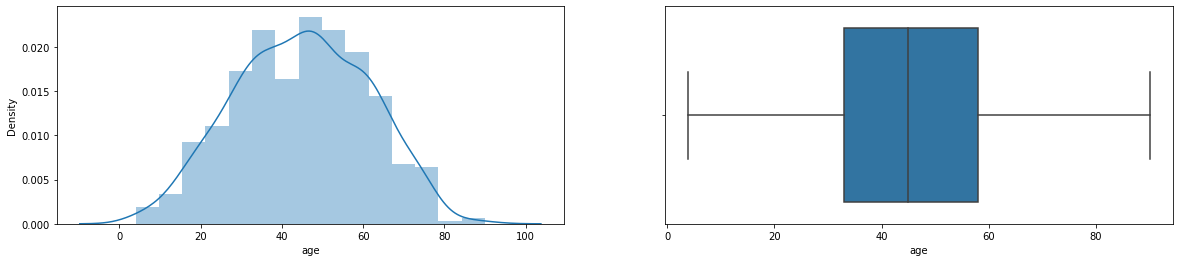

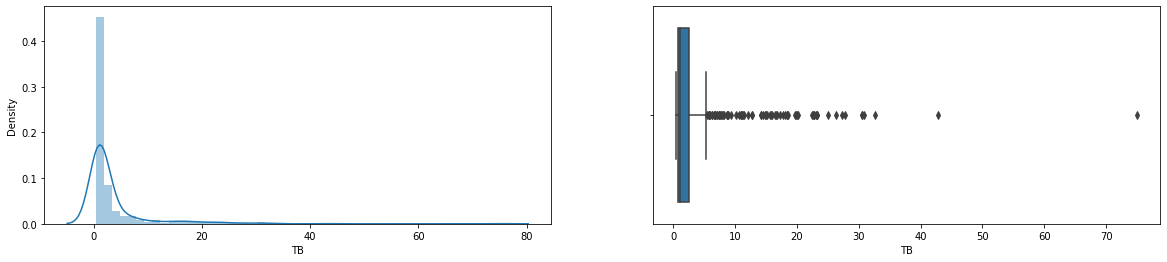

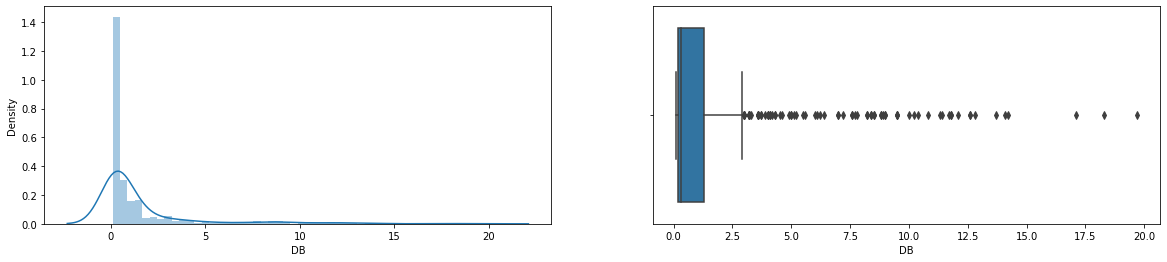

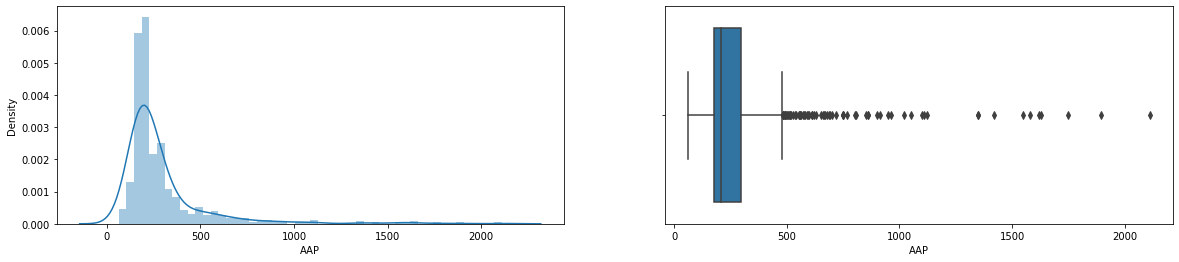

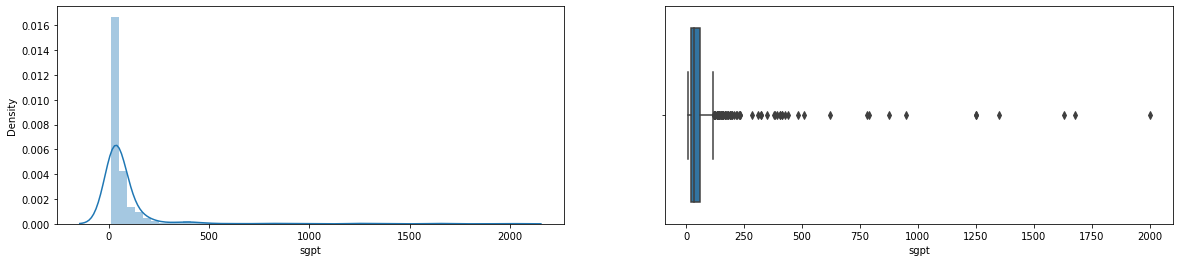

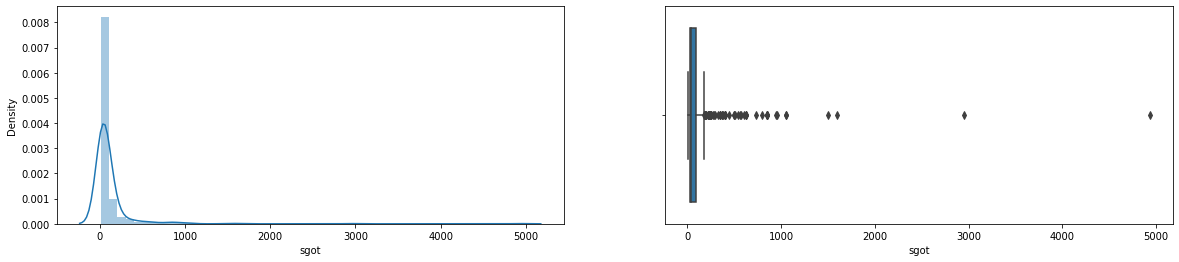

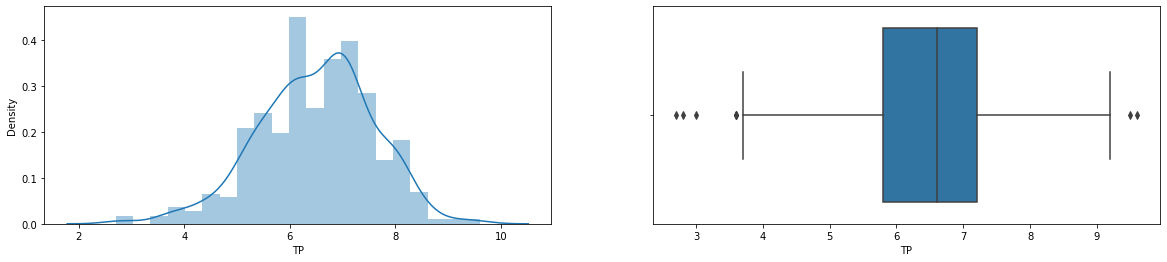

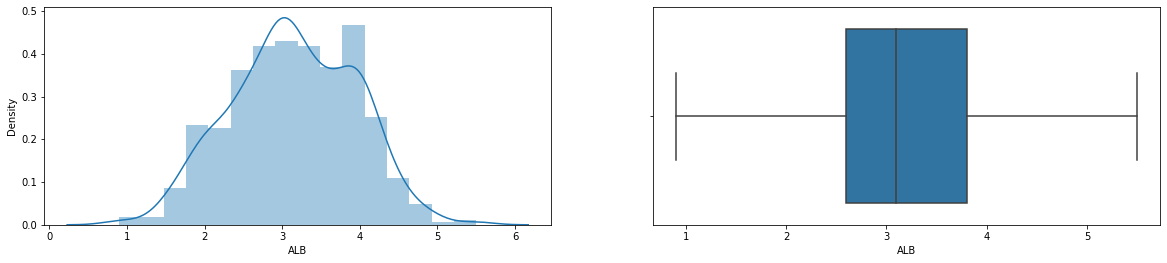

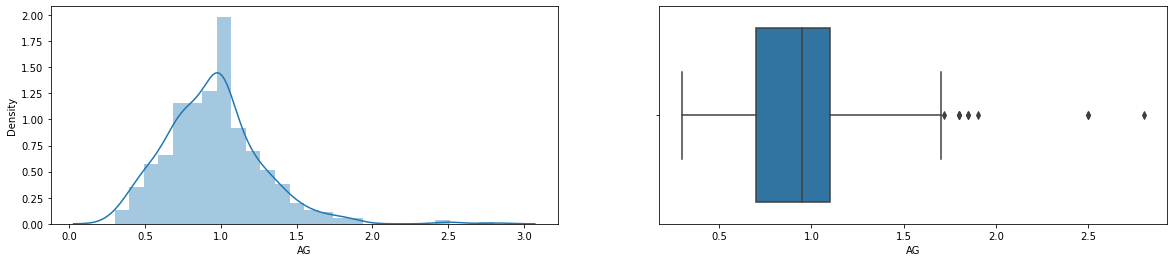

In [77]:
numeric = data.drop(['selector', 'gender'], axis=1)
columns = list(numeric.columns)
for column in columns:
  plo = plt.figure(figsize=(20,4))
  plo.add_subplot(1,2,1)
  sns.distplot(data[column])
  plo.add_subplot(1,2,2)
  sns.boxplot(data[column])

Looking at the data from the graphs we can see both the distripution and what we would term as outliers in the sense. Considering that this is based on medical data; the outliers in themselves are pressumed to be the causes of said diseases thus they are not dropped from the dataset.

##Changing the gender column to a numeriacally representable value

We need our data to be as numerical as possible; the column gender described above is thus changed to wheteher or not the sample is Female with 1 demarcating yes the sample is a female and 0 representing male. Afterwards, the relicated data is dropped.

In [78]:
dum = pd.get_dummies(data['gender'])

In [79]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [80]:
sure = sure.drop(['gender','Male'], axis=1)

In [81]:
sure.head()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


#EXPLORATORY DATA ANALYSIS

In [82]:
toeda = sure.copy()

## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


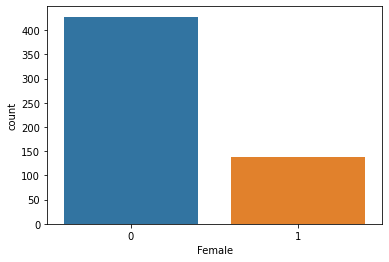

In [85]:
#A graphical representation on thenumber of women and the number of me

sns.countplot(toeda['Female'])

In [86]:
plt.bar(toeda['age' , bin = 5 ])

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


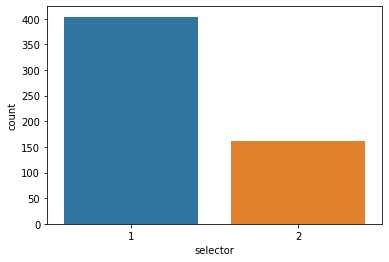

In [23]:
#selector is an encoded column that has 1 for the liver disease sample patients and
# 2 for the non liver disease patients

sns.countplot(toeda['selector'])

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

In [24]:
toeda['selector'].value_counts()

1    404
2    162
Name: selector, dtype: int64

##Distribution vs optimum

A distribution of the different lab tests

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


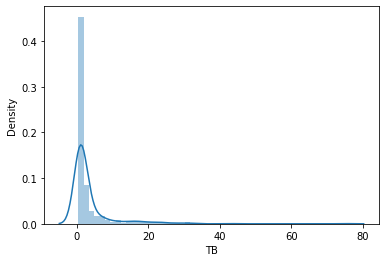

In [25]:
sns.distplot(toeda['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


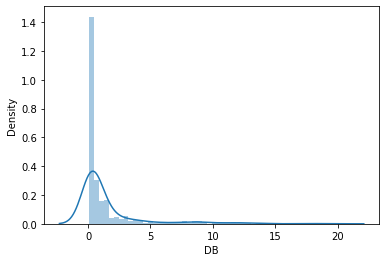

In [26]:
sns.distplot(toeda['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


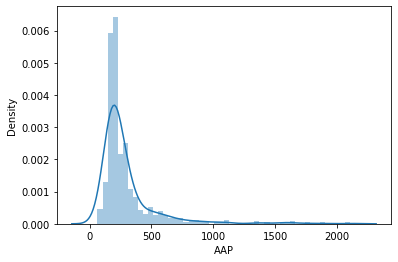

In [27]:
sns.distplot(toeda['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


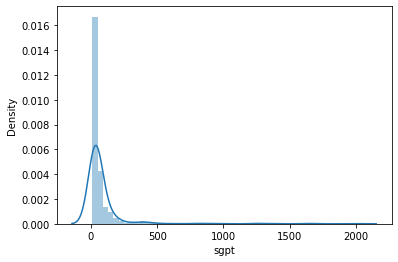

In [28]:
sns.distplot(toeda['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


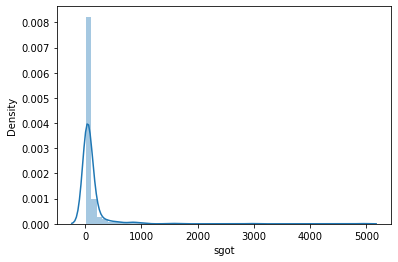

In [29]:
sns.distplot(toeda['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


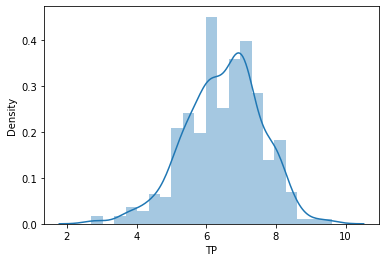

In [30]:
sns.distplot(toeda['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


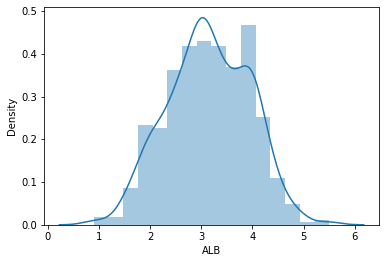

In [31]:
sns.distplot(toeda['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


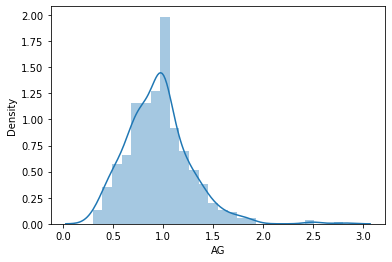

In [32]:
sns.distplot(toeda['AG'])

## Bivariate Analysis

### Correlation

<function matplotlib.pyplot.show>

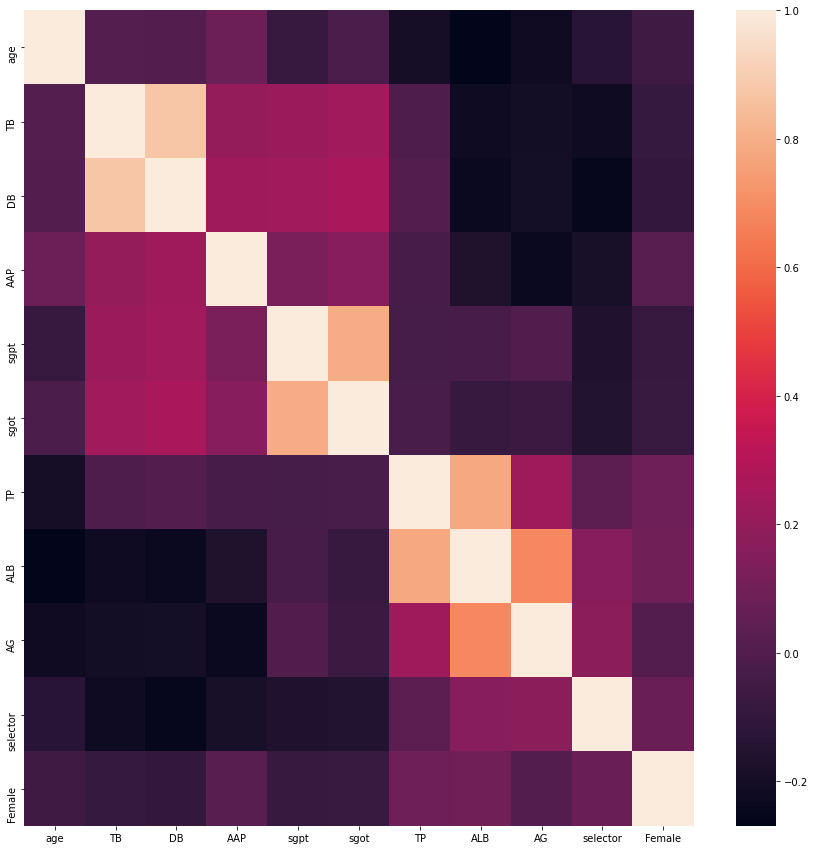

In [55]:
#A heatmap is created to show the correlation between different attributes of the
#data that has been collected
plt.figure(figsize=(15,15))
sns.heatmap(toeda.corr())
plt.show

In [34]:
#A correlation table is made to suppliment the information above

toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402,0.005611
selector,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000,0.077396


##Multicollinearity

The variable inflation factor is sought within the data to further look into.

In [35]:
independent_only = toeda.drop(columns=['selector'])

correlations = independent_only.corr()

correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.005611
Female,-0.057542,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,1.000000


In [36]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

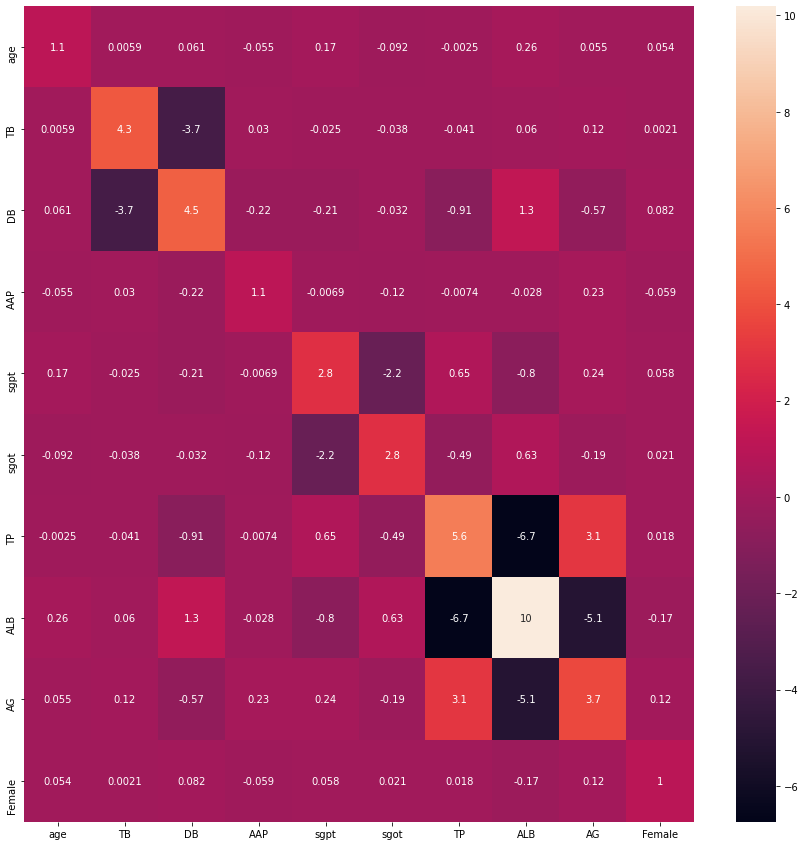

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

A VIF above 5 is deemed too high. Thus, said VIF is dropped because any VIF score above 5 will alter the results that are derived from models. Afterwards, and the VIF is sought for again to see if there is an alteration of the relative vif scores.

In [38]:
independent_only = independent_only.drop(columns=['ALB'])

correlations = independent_only.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

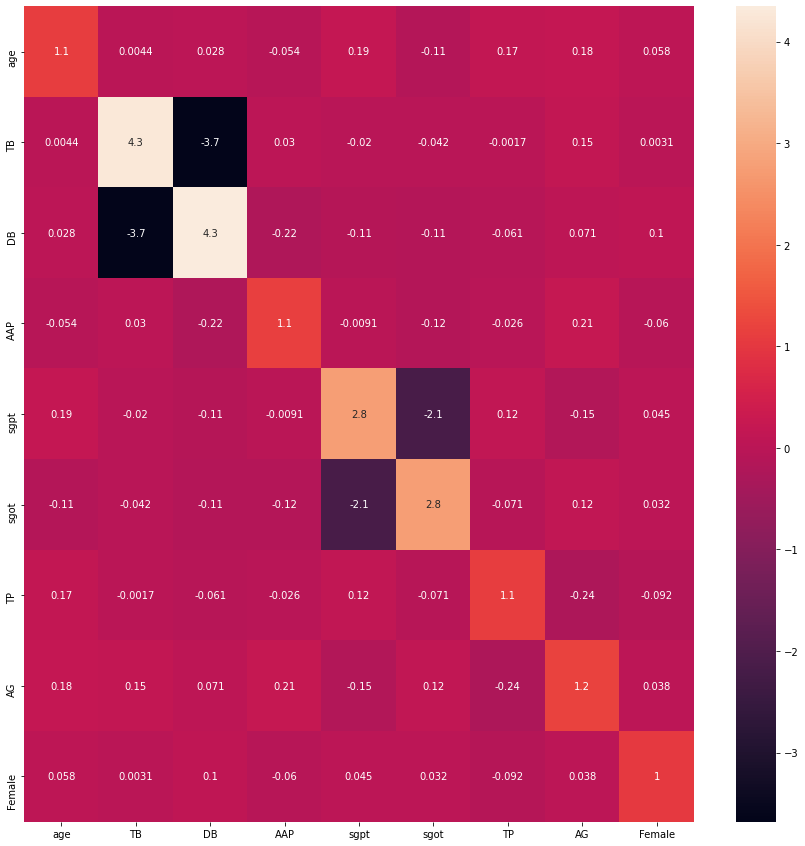

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

### NB
 - Drop ALB

In [40]:
test_features = independent_only.columns.to_list()

In [41]:
X = independent_only
y = toeda['selector']

In [42]:
a = independent_only.columns

In [43]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [44]:
np.unique(y, return_counts=True)

(array([1, 2]), array([162, 162]))

#MODEL TRAINING

Models are made so as to 

In [ ]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

## Random forest

### Part 1

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

model = forest.fit(x_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2
 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 1 2]

Accuracy score: 
 0.5538461538461539

The confusion matrix:
[[19 19]
 [10 17]]

The classification report:
              precision    recall  f1-score   support

           1       0.66      0.50      0.57        38
           2       0.47      0.63      0.54        27

    accuracy                           0.55        65
   macro avg       0.56      0.56      0.55        65
weighted avg       0.58      0.55      0.56        65



#### Feature importance

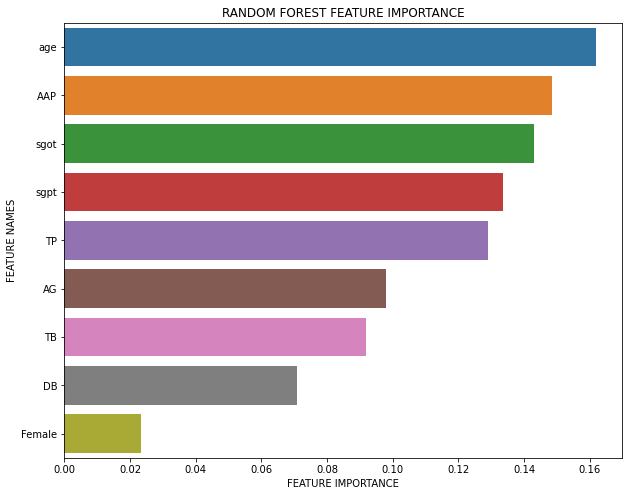

In [47]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

### Part 2

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = 4, 
                           verbose = 2)

In [49]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   13.5s


KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
par = grid_search.best_params_

max_depth = par['max_depth']
max_features = par['max_features']
min_samples_leaf = par['min_samples_leaf']
min_samples_split = par['min_samples_split']
n_estimators = par['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = n_estimators, 
                               random_state = 42, 
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               max_depth=max_depth)  

model = forest.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

#### Feature importance

In [ ]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

## Ada Boost

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)) 

model = ada_boost.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

#### Feature importance

In [ ]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate': [0.01,0.05,0.1,0.3,1],
 'algorithm':['SAMME','SAMME.R']
 }

ada=AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, 
                           param_grid=param_dist, 
                           cv = 5)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
par = grid_search.best_params_

learning_rate = par['learning_rate']
algorithm = par['algorithm']
n_estimators = par['n_estimators']

In [ ]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm=algorithm,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate, 
                              random_state=42) 

model = ada_boost.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

#### Feature importance

In [ ]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

## Gradient Boost

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

model = clf.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

#### Feature importance

In [ ]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
 'max_features': ['auto', 'sqrt', 'log2', None],
 'criterion': ['friedman_mse', 'mse', 'mae'],
 'loss': ['deviance', 'exponential']
 }

gf=GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gf, 
                           param_grid=param_dist, 
                           cv = 5)

grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
par = grid_search.best_params_

n_estimators = par['n_estimators']
learning_rate = par['learning_rate']
max_depth = par['max_depth']
min_samples_split = par['min_samples_split']
min_samples_leaf = par['min_samples_leaf']
max_features = par['max_features']
criterion = par['criterion']
loss = par['loss']

In [ ]:
clf = GradientBoostingClassifier(loss=loss, 
                                 learning_rate=learning_rate, 
                                 n_estimators=n_estimators, 
                                 criterion=criterion, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf, 
                                 max_depth=max_depth,   
                                 max_features=max_depth)

model = clf.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

#### Feature importance

In [ ]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

## SVM(Polymomial function)

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly')

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['poly'],
              'degree': [1],
              'degree': [1,2,3,4,5,6,7,8,9,10]
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
degree = par['degree']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
polyclassifier = SVC(C=c,
                     kernel=kernel, 
                     degree=degree, 
                     gamma=gamma,  
                     decision_function_shape=decision_function_shape)

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

## SVM( Radial basis function (rbf))

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3)

grid_search.fit(x_train, y_train)            

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
rbfclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

## SVM(Sigmoid function)

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['sigmoid'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)              

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
sigclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

## KNN

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

model = classifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
              }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters) 

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)             

In [ ]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric=metric)

model = classifier.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

## Naive Bayes( Multinomial)

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

Multinomial = MultinomialNB() 

model = Multinomial.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

parameters = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

grid_search = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=parameters,
                           cv=cv)

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

alpha = par['alpha'] 
fit_prior = par['fit_prior']

In [ ]:
Multinomial = MultinomialNB(alpha=alpha, fit_prior=fit_prior) 

model = Multinomial.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

## Naive Bayes( Gaussian)

### Part 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 

model = clf.fit(x_train, y_train) 
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

### Part 2

In [ ]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB




grid_search = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=parameters, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

var_smoothing = par['var_smoothing'] 

In [ ]:
clf = GaussianNB(var_smoothing=var_smoothing) 

model = clf.fit(x_train, y_train) 
model

In [ ]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')